***Practica 3: Redes Neuronales y Deep Learning***
Parte A: Perceptrón multicapa

Para este proyecto se requiere la librería Scikit-Learn, que ya se encuentra instalada en el entorno del alumno.

En caso de ser necesario se puede instalar usando la siguiente celda de código.

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Función para generar datos aleatorios
def generar_datos(n_puntos=1000, seed=42):
    np.random.seed(seed)
    presion_arterial = np.random.uniform(80, 180, n_puntos)
    colesterol = np.random.uniform(150, 300, n_puntos)
    data = np.column_stack((presion_arterial, colesterol))
    return data

# Función para calcular el riesgo cardiovascular
def calcular_riesgo(data):
    riesgo = []
    for presion, colesterol in data:
        if presion > 140 or colesterol > 240:
            riesgo.append(1)  # Riesgo alto
        else:
            riesgo.append(0)  # Riesgo bajo
    return np.array(riesgo)

# Generar datos y calcular el riesgo
data = generar_datos()
riesgo = calcular_riesgo(data)

c:\Users\danid\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danid\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


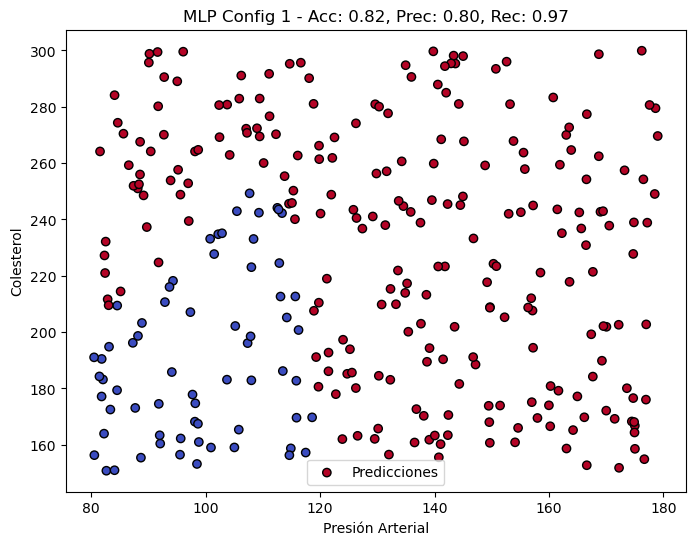

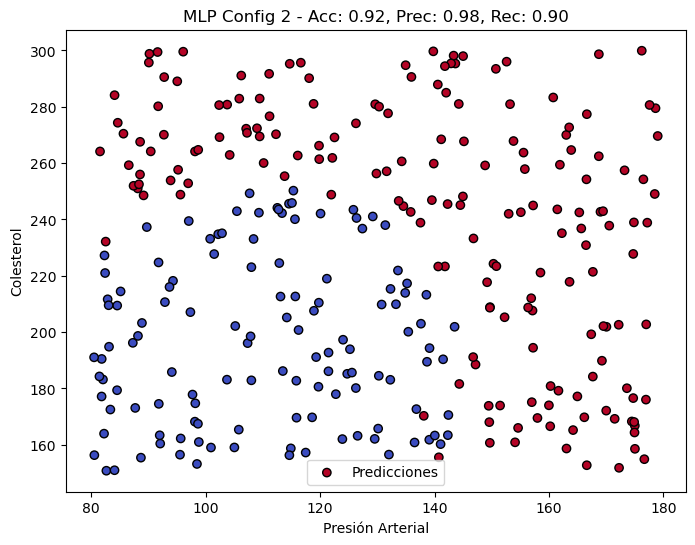

Resultados de la Configuración 1:
Precisión: 0.82, Precisión: 0.80, Recall: 0.97
Resultados de la Configuración 2:
Precisión: 0.92, Precisión: 0.98, Recall: 0.90
La Configuración 2 tiene mejor precisión.


In [ ]:
# Dividir los datos en entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(data, riesgo, test_size=0.3, random_state=42)

# Configuración 1: Red neuronal con menos neuronas
mlp1 = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp1.fit(X_train, y_train) #Entrenamiento de la red neuronal

# Evaluación de la configuración 1
y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)

# Configuración 2: Red neuronal con más neuronas
mlp2 = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp2.fit(X_train, y_train) #Entrenamiento de la red neuronal

# Evaluación de la configuración 2
y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)

# Función para graficar los resultados
def plot_results(X, y, model, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), cmap='coolwarm', marker='o', edgecolor='k', label='Predicciones')
    plt.xlabel('Presión Arterial')
    plt.ylabel('Colesterol')
    plt.title(title)
    plt.legend()
    plt.show()

# Graficar resultados de ambas configuraciones
plot_results(X_test, y_test, mlp1, f'MLP Config 1 - Acc: {accuracy1:.2f}, Prec: {precision1:.2f}, Rec: {recall1:.2f}')
plot_results(X_test, y_test, mlp2, f'MLP Config 2 - Acc: {accuracy2:.2f}, Prec: {precision2:.2f}, Rec: {recall2:.2f}')

# Comparación de configuraciones
print("Resultados de la Configuración 1:")
print(f"Precisión: {accuracy1:.2f}, Precisión: {precision1:.2f}, Recall: {recall1:.2f}")
print("Resultados de la Configuración 2:")
print(f"Precisión: {accuracy2:.2f}, Precisión: {precision2:.2f}, Recall: {recall2:.2f}")

# Discusión de resultados
if accuracy1 > accuracy2:
    print("La Configuración 1 tiene mejor precisión.")
else:
    print("La Configuración 2 tiene mejor precisión.")

Como podemos observar en las dos figuras la segunda configuración del modelo basado en MLPClassifier es más precisa que la primera en todas las métricas, esto se debe a que contiene un número de neuronas mayor que la primera configuración lo que permite establecer relaciones más precisas.